## E4040 2024 Fall Project
### Improving CNN Robustness via CS Shapley Value-guided Augmentation

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

tf.test.gpu_device_name()

'/device:GPU:0'

### Import CIFAR-10 data and training ResNet18 with 60 epochs

In [2]:
from utils.ResNet18_trainer import ResNet18_trainer, load_cifar10_dataset

In [3]:
batch_size = 128
lr = 0.1
momentum = 0.9
decay = 0.0005
epochs=60
num_classes=10
checkpoint_dir="./checkpoints1"
model_path = "./saved_model1"

In [4]:
train_ds, test_ds = load_cifar10_dataset(batch_size)

In [5]:
trainer = ResNet18_trainer(
    train_ds=train_ds,
    test_ds=test_ds,
    num_classes=num_classes,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    momentum=momentum,
    decay=decay,
    checkpoint_dir=checkpoint_dir
)

In [6]:
trainer.run()

No checkpoint found. Starting from scratch.
Training Epoch 1
Epoch 1, Loss: 2.067683696746826, Accuracy: 28.310001373291016, Test Loss: 1.5836601257324219, Test Accuracy: 42.69999694824219, Training Time: 0:01:06.249099
Checkpoint saved at: ./checkpoints1/ckpt_epoch_1.h5
Training Epoch 2
Epoch 2, Loss: 2.014183521270752, Accuracy: 30.97599983215332, Test Loss: 1.5580183267593384, Test Accuracy: 41.61000061035156, Training Time: 0:01:00.326300
Checkpoint saved at: ./checkpoints1/ckpt_epoch_2.h5
Training Epoch 3
Epoch 3, Loss: 1.3904081583023071, Accuracy: 49.3120002746582, Test Loss: 1.2218672037124634, Test Accuracy: 56.209999084472656, Training Time: 0:01:00.351850
Checkpoint saved at: ./checkpoints1/ckpt_epoch_3.h5
Training Epoch 4
Epoch 4, Loss: 1.0918962955474854, Accuracy: 61.15599822998047, Test Loss: 0.9703238010406494, Test Accuracy: 66.05999755859375, Training Time: 0:01:00.280833
Checkpoint saved at: ./checkpoints1/ckpt_epoch_4.h5
Training Epoch 5
Epoch 5, Loss: 0.88100790977

Epoch 37, Loss: 0.07844989001750946, Accuracy: 97.2239990234375, Test Loss: 0.3906303942203522, Test Accuracy: 90.02000427246094, Training Time: 0:01:00.279852
Checkpoint saved at: ./checkpoints1/ckpt_epoch_37.h5
Training Epoch 38
Epoch 38, Loss: 0.06736187636852264, Accuracy: 97.6259994506836, Test Loss: 0.44314149022102356, Test Accuracy: 89.30000305175781, Training Time: 0:01:00.262742
Checkpoint saved at: ./checkpoints1/ckpt_epoch_38.h5
Training Epoch 39
Epoch 39, Loss: 0.06612104922533035, Accuracy: 97.73799896240234, Test Loss: 0.4114791750907898, Test Accuracy: 89.84000396728516, Training Time: 0:01:00.311637
Checkpoint saved at: ./checkpoints1/ckpt_epoch_39.h5
Training Epoch 40
Epoch 40, Loss: 0.06193876639008522, Accuracy: 97.81600189208984, Test Loss: 0.41403728723526, Test Accuracy: 90.05000305175781, Training Time: 0:01:00.228836
Checkpoint saved at: ./checkpoints1/ckpt_epoch_40.h5
Training Epoch 41
Epoch 41, Loss: 0.06026388332247734, Accuracy: 97.83200073242188, Test Loss

In [7]:
trainer.model.save(model_path)
print("Model saved.")

INFO:tensorflow:Assets written to: ./saved_model1/assets
Model saved.


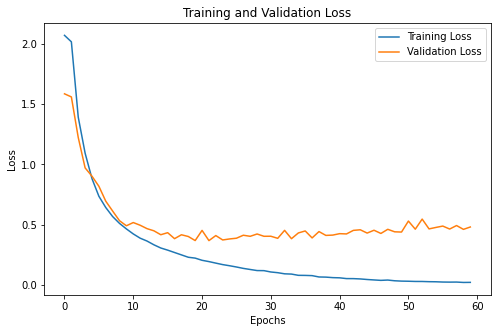

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(trainer.train_loss_history, label='Training Loss')
plt.plot(trainer.test_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

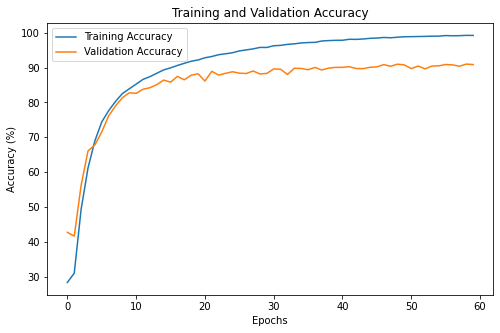

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(trainer.train_accuracy_history, label='Training Accuracy')
plt.plot(trainer.test_accuracy_history, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()